In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [7]:
import os

count = 0
base_path = 'Multi-Label-classification/appreal/'  # Use forward slashes

dirs = os.listdir(base_path)  # List main folders

for dir in dirs:
    dir_path = os.path.join(base_path, dir)  # Correctly join paths
    if os.path.isdir(dir_path):  # Check if it's a valid directory
        files = os.listdir(dir_path)  # List files inside the directory
        print(f"{dir} Folder has {len(files)} images")
        count += len(files)

print(f"Total images in all folders: {count}")


black_dress Folder has 450 images
black_pants Folder has 871 images
black_shirt Folder has 715 images
black_shoes Folder has 766 images
black_shorts Folder has 328 images
blue_dress Folder has 502 images
blue_pants Folder has 798 images
blue_shirt Folder has 741 images
blue_shoes Folder has 523 images
blue_shorts Folder has 299 images
brown_pants Folder has 311 images
brown_shoes Folder has 464 images
brown_shorts Folder has 40 images
green_pants Folder has 227 images
green_shirt Folder has 230 images
green_shoes Folder has 455 images
green_shorts Folder has 135 images
red_dress Folder has 800 images
red_pants Folder has 308 images
red_shoes Folder has 610 images
white_dress Folder has 818 images
white_pants Folder has 274 images
white_shoes Folder has 600 images
white_shorts Folder has 120 images
Total images in all folders: 11385


In [10]:
base_dir = 'Multi-Label-classification/appreal/'
img_size = 180
batch = 32

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 11385 files belonging to 24 classes.
Using 9108 files for training.
Found 11385 files belonging to 24 classes.
Using 2277 files for validation.


In [12]:
appreal_names = train_ds.class_names
#flower_names
appreal_names

['black_dress',
 'black_pants',
 'black_shirt',
 'black_shoes',
 'black_shorts',
 'blue_dress',
 'blue_pants',
 'blue_shirt',
 'blue_shoes',
 'blue_shorts',
 'brown_pants',
 'brown_shoes',
 'brown_shorts',
 'green_pants',
 'green_shirt',
 'green_shoes',
 'green_shorts',
 'red_dress',
 'red_pants',
 'red_shoes',
 'white_dress',
 'white_pants',
 'white_shoes',
 'white_shorts']

In [13]:
import matplotlib.pyplot as plt

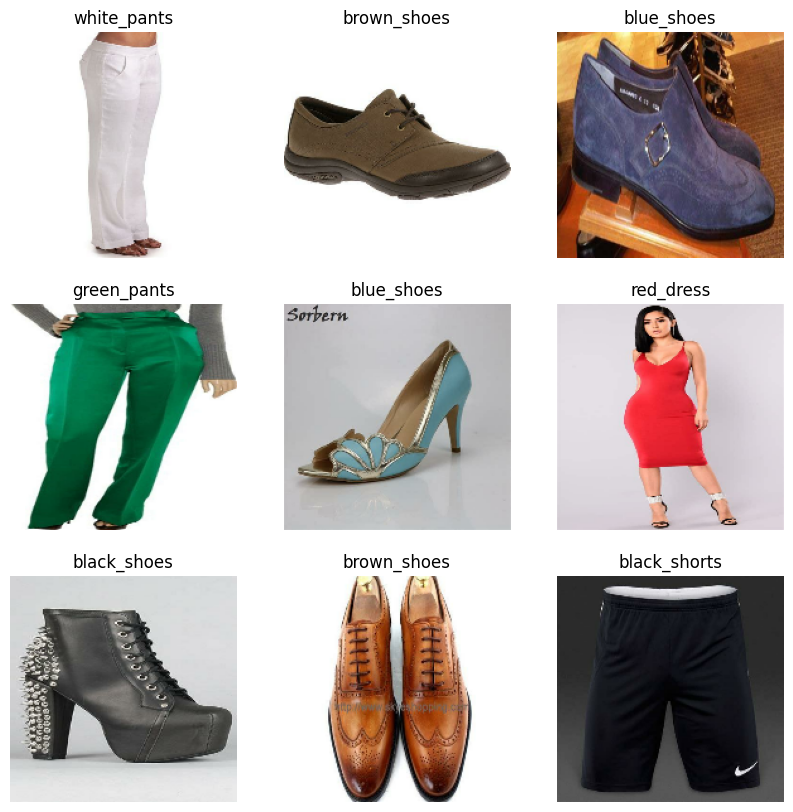

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(appreal_names[labels[i]])
        plt.axis('off')

In [16]:
AUTOTUNE = tf.data.AUTOTUNE

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [18]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [19]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

c:\Users\Asus\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


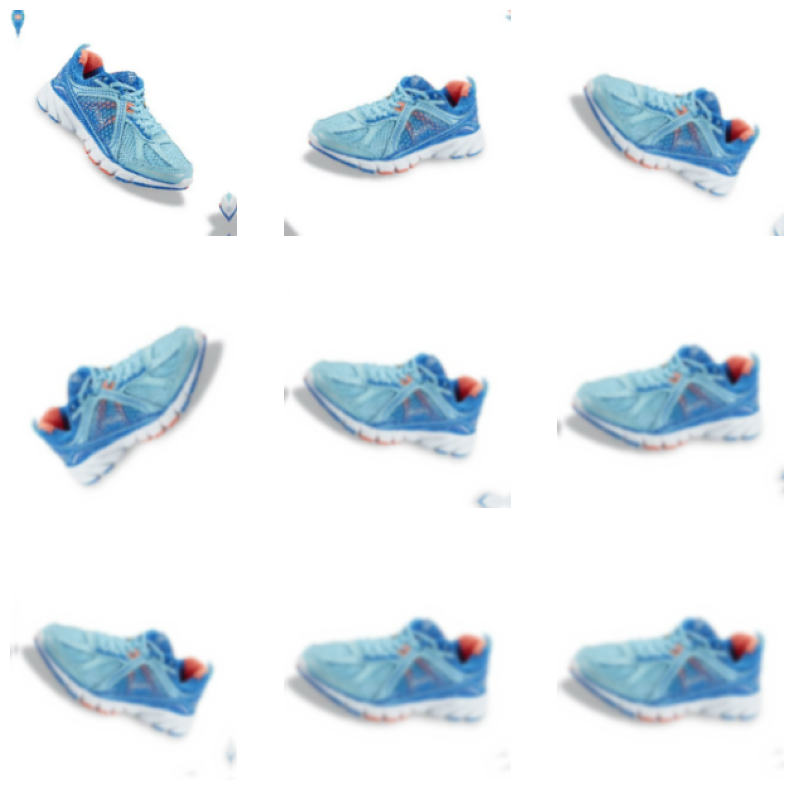

In [20]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [26]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(24)
])

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,991,607 (15.23 MB)

 Trainable params: 3,991,607 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
import tensorflow as tf

# Function to get the correct number of classes
def get_num_classes(dataset):
    unique_labels = set()
    for _, labels in dataset.take(100):  # Check up to 100 batches
        unique_labels.update(labels.numpy().tolist())  
    return max(unique_labels) + 1  # Max label + 1 gives correct num_classes

# Get the correct number of classes from the training dataset
num_classes = get_num_classes(train_ds)
print(f"Detected {num_classes} classes.")

# Update the model's last layer dynamically
model.pop()  # Remove last layer (if needed)
model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))  # Correct number of output classes

# Recompile the model with correct loss function
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(train_ds, epochs=15, validation_data=val_ds)


Detected 24 classes.
Epoch 1/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 103s 357ms/step - accuracy: 0.3768 - loss: 2.1801 - val_accuracy: 0.6926 - val_loss: 0.9907
Epoch 2/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 101s 354ms/step - accuracy: 0.7236 - loss: 0.8556 - val_accuracy: 0.7721 - val_loss: 0.7356
Epoch 3/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 96s 337ms/step - accuracy: 0.7907 - loss: 0.6496 - val_accuracy: 0.8151 - val_loss: 0.5964
Epoch 4/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 103s 363ms/step - accuracy: 0.8061 - loss: 0.6141 - val_accuracy: 0.8050 - val_loss: 0.6350
Epoch 5/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 82s 287ms/step - accuracy: 0.8239 - loss: 0.5402 - val_accuracy: 0.8138 - val_loss: 0.6057
Epoch 6/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 80s 279ms/step - accuracy: 0.8382 - loss: 0.5047 - val_accuracy: 0.8401 - val_loss: 0.5073
Epoch 7/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 79s 277ms/step - accuracy: 0.8508 - loss: 0.4629 - val_accuracy: 0.8322 - val_loss: 0.5731
Epoch 8/15
285/285 ━━━━━━━━━━━━━━━━━━━━ 76s 268ms/step - ac

In [31]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + appreal_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [32]:
classify_images(r'Multi-Label-classification\appreal\blue_shoes\00a9e2fb75e93c3c757b1ff908d9fcc7097f6c46.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


'The Image belongs to blue_shoes with a score of 10.16663'

In [33]:
classify_images(r'Multi-Label-classification/appreal/blue_pants/0a1ac7c42b24464426f4f54ddc04ba55354a51b9.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


'The Image belongs to blue_pants with a score of 10.297873'

In [34]:
classify_images(r'Multi-Label-classification\appreal\black_shirt\0a4ed000d20e1f1ccc7effd23fa659dbda0e38a3.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


'The Image belongs to black_shirt with a score of 10.536949'